# **`pycoco`** and **`CoCo`** 'recon' files

___

## Introduction

**`CoCo`** generates as an output, a series of files in `$COCO_ROOT_DIR/recon/`. In this notebook, we will interact with the reconstructed light curve file, the `$SNNAME.dat` and the `$SNNAME.stat` file.

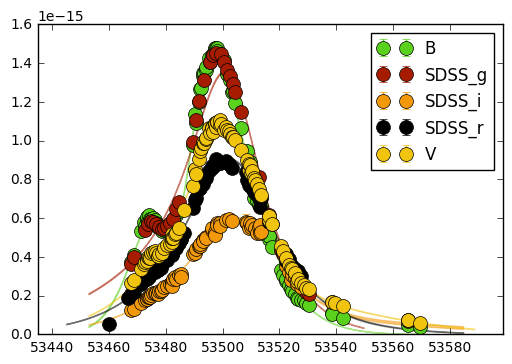

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

def col(i):
    colour = {0 : "#59D11D", 1 : "#A61C00", 2 : "#F2990A", \
              3 : "#000000", 4 : "#f1c40f", 5 : "#e67e22", \
              6 : "#e74c3c", 7 : "#1abc9c"}
    return colour[i % 8]

reconfile = '/Users/berto/Code/CoCo/recon/SN2005bf.dat'
lcfile = '/Users/berto/Code/verbose-enigma/testdata/lc/SN2005bf.dat'

RECON = np.loadtxt(reconfile, unpack=True, dtype=[('MJD', 'float'), ('Flux', 'float'), ('Error', 'float'), ('Filter', 'S10')])
LC = np.loadtxt(lcfile, unpack=True, dtype=[('MJD', 'float'), ('Flux', 'float'), ('Error', 'float'), ('Filter', 'S10')])
FLT = np.unique(LC[3])

for i in range(FLT.size):
    idx = np.where(LC[3] == FLT[i])
    plt.errorbar(LC[0][idx], LC[1][idx], yerr=LC[2][idx], markersize=10, fmt='o', color=col(i), label=FLT[i].decode())

    idx = np.where(RECON[3] == FLT[i])
    plt.fill_between(RECON[0][idx], RECON[1][idx] + RECON[2][idx], RECON[1][idx] - RECON[2][idx], color=col(i), alpha=0.5)


plt.xlim(RECON[0].min() - 10, RECON[0].max() + 10)
plt.legend()
plt.show()

In [2]:
from __future__ import print_function ## Force python3-like printing

%matplotlib inline
from matplotlib import pyplot as plt

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc

reload(pcc) ## FOR DEV

<module 'pycoco' from '/Users/berto/Code/verbose-enigma/pycoco/__init__.pyc'>

In [3]:
L = pcc.LCfit()

In [4]:
L.recon_directory

'/Users/berto/Code/CoCo/recon'

In [5]:
recon_filename = os.path.abspath(os.path.join(L.recon_directory, 'SN2005bf.dat'))
print(recon_filename)
L.load_formatted_phot(recon_filename)
L.unpack()

/Users/berto/Code/CoCo/recon/SN2005bf.dat


In [6]:
L.data

OrderedDict([('B', <Table length=137>
                MJD            flux                 flux_err        filter
                 d    erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)       
              float64        float64                float64          str6 
              ------- ---------------------- ---------------------- ------
              53452.7             4.0869e-17            1.84887e-18      B
              53453.7            4.89451e-17            2.07537e-18      B
              53454.7            5.84522e-17            2.31262e-18      B
              53455.7            6.95926e-17             2.5561e-18      B
              53456.7            8.25806e-17             2.7997e-18      B
              53457.7             9.7637e-17            3.03557e-18      B
              53458.7            1.14981e-16            3.25408e-18      B
              53459.7            1.34821e-16            3.44395e-18      B
              53460.7            1.57334e-16            3.5926

In [7]:
L.data_filters

OrderedDict([('B', <pycoco.FilterClass instance at 0x1102946c8>),
             ('SDSS_g', <pycoco.FilterClass instance at 0x110272cf8>),
             ('SDSS_i', <pycoco.FilterClass instance at 0x110272098>),
             ('SDSS_r', <pycoco.FilterClass instance at 0x110290bd8>),
             ('V', <pycoco.FilterClass instance at 0x110230320>)])

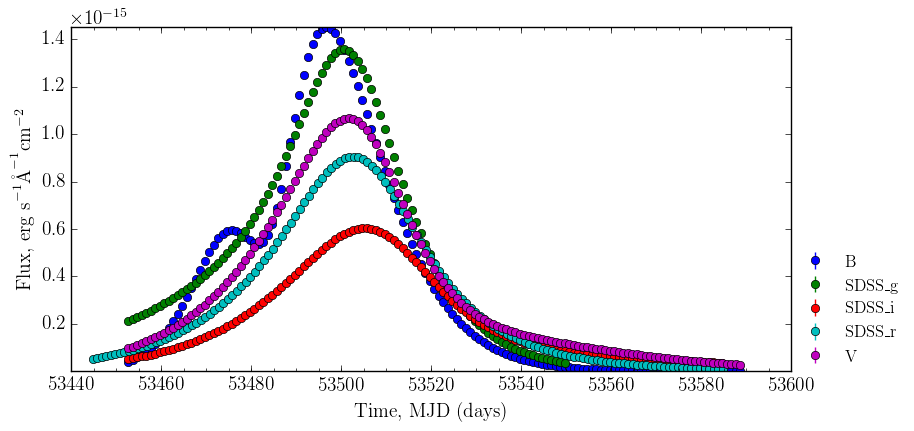

In [8]:
L.plot()